# 단순 선형회귀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. 아버지와 아들의 키 - Galton

In [3]:
df = pd.read_csv('https://www.randomservices.org/random/data/Galton.txt',sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


- 아버지와 아들의 키만 발췌하고 단위를 cm으로 변환

In [5]:
df = df[df.Gender == 'M']
height = df[['Father', 'Height']].rename(columns={'Height':'Son'})
height.head()

,Father,Son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5


In [6]:
height = height * 2.54
height.head()

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150
8,190.50,180.340
10,190.50,179.070


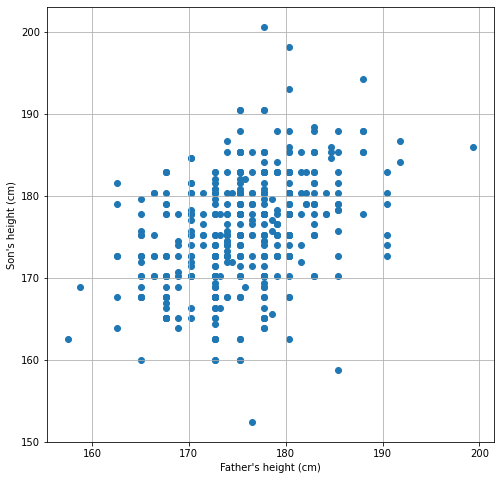

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(height.Father, height.Son) # x는 아버지의 키, y는 아들의 키 / 아버지의 키에따른 아들의 키를 구하려고 함
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.grid()
plt.show()

- Nunpy 최소 자승법을 이용해서 회귀선 구하기

In [8]:
A = np.vstack([height.Father, np.ones(len(height.Father))]).T
A.shape

(465, 2)

In [9]:
height.Father.shape

(465,)

In [10]:
# 최소자승 - lstsq
reg = np.linalg.lstsq(A, height.Son, rcond=None)
reg

(array([ 0.44774792, 97.17763701]),
 array([17556.59951549]),
 2,
 array([3.79064358e+03, 7.15847817e-01]))

In [11]:
# 기울기와 절편
m, c = reg[0]

In [12]:
# 잔차 제곱의 합 (Residual Sum of Square)
rss = reg[1][0]

In [13]:
m, c, rss

(0.44774791760302285, 97.1776370073939, 17556.599515494014)

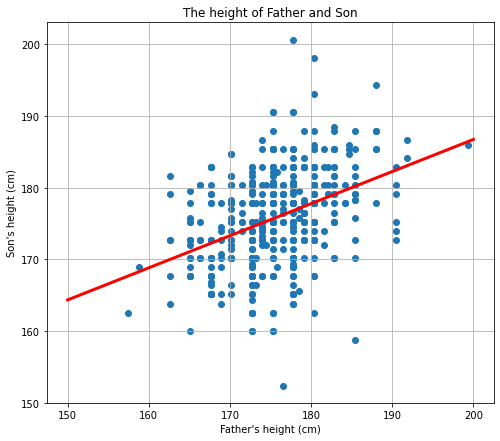

In [14]:
plt.figure(figsize=(8,7))
plt.scatter(height.Father, height.Son)
plt.plot([150, 200], [m*150+c, m*200+c], 'r', lw=3)
plt.title('The height of Father and Son')
plt.xlabel("Father's height (cm)"); plt.ylabel("Son's height (cm)")
plt.grid(); plt.show()

- Scikit-Learn

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
height.Father.values.shape

(465,)

In [17]:
X = height.Father.values.reshape(-1,1)
Y = height.Son.values

In [18]:
# shape을 (465,1)로 만들어주지않으면 feature가 몇개인지 몰라서 맞춰줘야한다. 일차원을 2d로 만들어줘야된다~
X.shape, Y.shape

((465, 1), (465,))

In [20]:
# 2D로 만들지 않을경우 이렇게 에러가 남 2D로 만들지 않을경우 이렇게 에러가 남
lr = LinearRegression()
lr.fit(height.Father.values, height.Son.values)
lr = LinearRegression()
lr.fit(height.Father.values, height.Son.values)

ValueError: Expected 2D array, got 1D array instead:
array=[199.39  191.77  191.77  190.5   190.5   190.5   190.5   190.5   190.5
 187.96  187.96  187.96  187.96  187.96  187.96  185.42  185.42  185.42
 185.42  185.42  185.42  185.42  185.42  185.42  185.42  185.42  185.42
 185.42  184.658 184.658 184.658 182.88  182.88  182.88  182.88  182.88
 182.88  182.88  182.88  182.88  182.88  182.88  182.88  182.88  184.15
 184.15  184.15  182.88  182.88  182.88  182.88  182.88  182.88  182.88
 180.34  180.34  180.34  180.34  180.34  180.34  180.34  180.34  180.34
 180.34  180.34  180.34  180.34  180.34  180.34  180.34  182.118 180.34
 180.34  180.34  180.34  181.61  181.61  181.61  180.34  180.34  182.118
 182.118 182.118 180.34  180.34  180.34  181.61  181.61  181.61  180.34
 180.34  180.34  180.34  180.34  180.34  180.34  180.34  180.34  180.34
 180.34  180.34  180.34  180.34  180.34  180.34  180.34  180.34  180.34
 180.34  180.34  180.34  177.8   177.8   177.8   177.8   177.8   177.8
 177.8   177.8   177.8   177.8   177.8   177.8   179.07  179.07  179.07
 179.07  177.8   177.8   177.8   177.8   177.8   177.8   177.8   177.8
 177.8   177.8   177.8   177.8   177.8   177.8   177.8   177.8   177.8
 177.8   177.8   177.8   177.8   177.8   177.8   177.8   177.8   177.8
 177.8   177.8   177.8   177.8   179.07  179.07  179.07  179.07  179.07
 179.07  177.8   177.8   177.8   177.8   177.8   177.8   177.8   177.8
 177.8   177.8   179.07  179.07  179.07  177.8   177.8   177.8   177.8
 177.8   177.8   179.07  179.07  179.07  179.07  179.07  178.562 178.562
 178.562 178.562 179.07  179.07  177.8   177.8   177.8   177.8   177.8
 177.8   177.8   177.8   175.26  175.26  175.26  175.26  175.26  175.26
 175.26  175.26  175.26  175.26  175.26  175.26  175.26  175.26  175.26
 175.26  175.26  175.26  175.26  175.26  175.26  175.26  175.26  176.53
 176.53  175.26  176.53  176.53  176.53  176.53  175.26  175.26  175.26
 175.26  175.26  175.26  175.26  176.53  176.53  176.53  175.768 175.768
 175.26  175.26  175.26  175.26  175.26  175.26  175.26  175.26  175.26
 175.26  176.53  176.53  176.53  175.26  175.26  175.26  175.26  175.26
 175.26  175.26  175.26  175.26  175.26  176.53  176.53  176.53  175.26
 175.26  175.26  175.26  175.26  175.26  175.26  175.26  175.26  175.26
 174.498 173.99  173.99  173.99  173.99  173.99  173.99  173.99  173.99
 173.99  173.99  173.99  172.72  172.72  172.72  172.72  172.72  172.72
 172.72  172.72  172.72  173.99  173.99  173.99  173.99  172.72  172.72
 172.72  172.72  172.72  172.72  172.72  172.72  172.72  172.72  172.72
 172.72  172.72  172.72  172.72  172.72  172.72  172.72  173.99  173.99
 173.99  172.72  172.72  172.72  172.72  172.72  172.72  172.72  172.72
 172.72  172.72  172.72  173.99  172.72  173.228 173.228 173.228 173.228
 172.72  174.498 172.72  172.72  172.72  172.72  172.72  172.72  172.72
 172.72  172.72  173.99  172.72  172.72  172.72  172.72  172.72  172.72
 170.18  170.18  170.18  170.18  170.18  170.18  170.18  170.18  170.18
 170.18  170.18  171.45  171.45  170.18  170.18  170.18  170.18  170.18
 170.18  170.18  170.18  170.18  170.18  170.18  170.18  170.18  171.45
 171.45  171.45  171.45  170.18  167.64  167.64  167.64  167.64  167.64
 167.64  167.64  167.64  167.64  167.64  167.64  167.64  168.91  168.91
 168.91  168.91  167.64  167.64  167.64  167.64  168.91  168.91  168.91
 168.91  168.91  167.64  167.64  167.64  167.64  167.64  167.64  167.64
 167.64  167.64  167.64  167.64  167.64  165.1   165.1   165.1   165.1
 165.1   165.1   165.1   165.1   165.1   165.1   165.1   165.1   165.1
 165.1   165.1   165.1   165.1   166.37  166.37  166.37  166.37  166.37
 166.37  166.37  162.56  162.56  162.56  162.56  162.56  162.56  157.48
 158.75  173.99  173.99  173.99  173.99  173.99 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [22]:
lr = LinearRegression()
lr.fit(X, Y)   # X는 2D Array 이어야 한다 

LinearRegression()

In [25]:
weight, bias = lr.coef_, lr.intercept_
rss = lr._residues
weight[0], bias, rss

(0.4477479176030255, 97.17763700739346, 17556.59951549399)

In [ ]:
# numpy로 구한값이나 scikit-learn으로 구한값이나 결국 같다
(0.4477479176030255, 97.17763700739346, 17556.59951549399)